<h1>$\color{Blue}{Borna \hspace{0.2cm} Tavassoli}$</h1>
<h3>$\color{Blue}{CA3 - 810198374}$</h3>

<h3>$\color{red}{Section \hspace{0.2cm} One:}$</h3>

In [1]:
from __future__ import unicode_literals
from hazm import *
import pandas as pd

In [2]:
data_test = pd.read_csv("./Data/divar_test.csv")
data_train = pd.read_csv("./Data/divar_train.csv")

In [3]:
data_train

,title,description,categories
0,بلبل خرمایی,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خ...,leisure-hobbies
1,عینک اسکی در حد,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی م...,leisure-hobbies
2,تکیه سر تویوتا پرادو,پارچه ای سالم و تمیز.,vehicles
3,مجسمه کریستال24%,مجسمه دکوری کریستال بالرین Rcr24%,for-the-home
4,کیف و ساک,هر 2 کاملا تمیز هستند,personal
...,...,...,...
10195,ان هاش 85,نیمه دوم همه چی به شرط در حد خشک 260تا کار,vehicles
10196,405 دوگانه کارخانه. تمیز,فابریک 4 حلقه لاستیک 205 نو بیمه یکسال تخفیف ب...,vehicles
10197,بخاری گازی دودکش دار پلار,بخاری نو و بسیار تمیز هستش\nبا مشتری واقعی کنا...,for-the-home
10198,نر کله برنجی چتری,سلام به دلیل کمبود جا واسباب کشی به کمترین قیم...,leisure-hobbies


In [4]:
data_test

,title,description,categories
0,کیف مجلسی نو,کیف مجلسی نوی نو,personal
1,دیوار کوب نمدی تزیینی,مناسب برای جهاز عروس,for-the-home
2,دو تیکه بسیار بسیار تمیز و سالم,با کشوی مخفی و شیک,for-the-home
3,مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nم...,electronic-devices
4,تعداد18عددبوقلمون به قیمت عمده,سلام تعدای بوقلمون دارم به علت جابه جایی به فر...,leisure-hobbies
...,...,...,...
1795,باسکول 300کیلویی,سالمه سالمه بشرط\nقیمت نوش داخل بازار600تومنه,businesses
1796,میز مدیریتی با کنفرانس,میز مدیریتی با کنفرانس \nتمیز سالم بدون خط و خش,businesses
1797,باند aiwa,سالم،با اسپیکر,electronic-devices
1798,عروس هلندی مولد,پنج تا عروس هلندی، دو جفت ویک تک،یه جفتش دم ت...,leisure-hobbies


In [5]:
#stop_words = {'از', 'به', 'با', 'بی', 'در', 'بر', 'برای', 'تا', 'مگر', 'جز', 'چون', 'اندر', 'را', 'که', 'اما', 'اگر', 'اگه', 'و', 'هر', '.', '!', 'چه', 'یا', 'ی', '،', ':', '؛'}
import codecs

stop_words = codecs.open('persian', encoding='utf-8').read().split('\n')
stop_words = [x.strip() for x in stop_words]
stop_words[20:25]

['آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام']

In [6]:
normalizer = Normalizer()
row_no = data_train.shape[0]
col_no = data_train.shape[1]
for i in range(0, row_no):
    for j in range(0, col_no - 1):
        data_train.iat[i, j] = normalizer.normalize(data_train.iloc[i][j])
        word_tokens = word_tokenize(data_train.iloc[i][j])
        filtered_sentence = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        data_train.iat[i, j] = filtered_sentence

In [7]:
data_train

,title,description,categories
0,"[بلبل, خرمایی]","[سه, عدد, بلبل, خرمایی, سه, ماهه, جوجه, بزرگشو...",leisure-hobbies
1,"[عینک, اسکی, حد]","[عینک, اسکی, دبل, لنز, مارک, یو, وکس, حد, نو, ...",leisure-hobbies
2,"[تکیه, تویوتا, پرادو]","[پارچه‌ای, سالم, تمیز]",vehicles
3,"[مجسمه, کریستال, ۲۴]","[مجسمه, دکوری, کریستال, بالرین, Rcr, ۲۴]",for-the-home
4,"[کیف, ساک]",[تمیز],personal
...,...,...,...
10195,"[هاش, ۸۵]","[نیمه, شرط, حد, خشک, ۲۶۰, کار]",vehicles
10196,"[۴۰۵, دوگانه, کارخانه, تمیز]","[فابریک, حلقه, لاستیک, ۲۰۵, نو, بیمه, تخفیف, ب...",vehicles
10197,"[بخاری, گازی, دودکش, پلار]","[بخاری, نو, تمیز, مشتری, میام]",for-the-home
10198,"[نر, کله, برنجی, چتری]","[سلام, دلیل, کمبود, واسباب, کشی, کمترین, قیمت,...",leisure-hobbies


In [8]:
row_no_t = data_test.shape[0]
col_no_t = data_test.shape[1]
for i in range(0, row_no_t):
    for j in range(0, col_no_t - 1):
        word_tokens_t = word_tokenize(data_test.iloc[i][j])
        filtered_sentence_t = []
        for w in word_tokens_t:
            if w not in stop_words:
                filtered_sentence_t.append(w)
        data_test.iat[i, j] = filtered_sentence_t

In [9]:
data_test

,title,description,categories
0,"[کیف, مجلسی, نو]","[کیف, مجلسی, نوی, نو]",personal
1,"[دیوار, کوب, نمدی, تزیینی]","[مناسب, جهاز, عروس]",for-the-home
2,"[تیکه, تمیز, سالم]","[کشوی, مخفی]",for-the-home
3,[مودم],"[سلام, مودم, سالم, وسایلش, کارم, نمیاد, مارکzy...",electronic-devices
4,"[تعداد, 18, عددبوقلمون, قیمت]","[سلام, تعدای, بوقلمون, علت, جابه, فروش, رسد, ج...",leisure-hobbies
...,...,...,...
1795,"[باسکول, 300, کیلویی]","[سالمه, سالمه, بشرط, قیمت, نوش, بازار, 600, تو...",businesses
1796,"[میز, مدیریتی, کنفرانس]","[میز, مدیریتی, کنفرانس, تمیز, سالم, خط, خش]",businesses
1797,"[باند, aiwa]","[سالم, اسپیکر]",electronic-devices
1798,"[عروس, هلندی, مولد]","[عروس, هلندی, جفت, ویک, تک, جفتش, تخمه, سالم, ...",leisure-hobbies


We've normalized and removed stop words for the "title" and "description" columns in the above section!

In [10]:
# stemmer = Stemmer()
# lemmatizer = Lemmatizer()

# for i in range(0, row_no):
#     for j in range(0, col_no - 1):
#         words = data_train.iat[i, j]
#         new_words = []
#         for word in words:
#             stem_word = stemmer.stem(word) #less acuraccy
#             lem_word = lemmatizer.lemmatize(word) #more accuracy
#             new_words.append(lem_word)
#         data_train.iat[i, j] = new_words

We can see that these methods can be damaging because sometimes they change the meaning. On the other hand they can be useful when they return the root of the word so we can categorize similar words. 

<h3>$\color{red}{Section \hspace{0.2cm} Two:}$</h3>

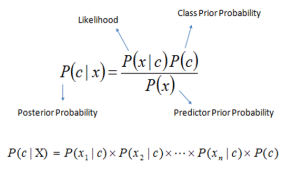

We want to calculate the probability of finding a specific class using a known word (i.e. P(c|x)). To do so, we can first calculate the likelihood of the words in a class, and then use this value alongside the prior probability (the event that leads to the posterior probability which we aim to calculate). Here the prior probability, is the chance of seeing a particular word. Similary P(c) is the chance of seeing a specific class type. Note that we can ignore P(c) because it's equal to $\frac{1}{6}$ for all classes! Needless to say, P(x) is the chance of seeing the word 'x'.

In [11]:
category = ["vehicles", "electronic-devices", "businesses", "for-the-home", "personal", "leisure-hobbies"]
category_dict = [{}, {}, {}, {}, {}, {}]
category_size = [0, 0, 0, 0, 0, 0]
for c in range(0, 6):
    for i in range(0, row_no):
        for j in range(0, col_no - 1):
            if (data_train.iat[i, col_no - 1] == category[c]):
                words = data_train.iat[i, j]
                for word in words:
                    if word in category_dict[c].keys():
                        category_dict[c][word] += 1
                    else:
                        category_dict[c].update({word: 1})
                    category_size[c] += 1

for i in range(0, 6):
    print("#", category[i], "has", category_size[i], "words.")

# vehicles has 26559 words.
# electronic-devices has 27908 words.
# businesses has 24102 words.
# for-the-home has 19746 words.
# personal has 21788 words.
# leisure-hobbies has 24781 words.


We can see that our dataset is nearly balanced. We've now trained our data and are ready to estimate the divar_train.csv file using the naive bayes method mentioned before.

In [12]:
import math #we use log to store the multiplication of probabilities
tp = {"vehicles" : 0, "electronic-devices" : 0, "businesses" : 0, "for-the-home" : 0, "personal" : 0, "leisure-hobbies" : 0}
fp = {"vehicles" : 0, "electronic-devices" : 0, "businesses" : 0, "for-the-home" : 0, "personal" : 0, "leisure-hobbies" : 0}
fn = {"vehicles" : 0, "electronic-devices" : 0, "businesses" : 0, "for-the-home" : 0, "personal" : 0, "leisure-hobbies" : 0}
y_pred = []
correct_detected = 0
for i in range(0, row_no_t):
    max_category = [0, 0, 0, 0, 0, 0] 
    for c in range(0, 6):
        for j in range(0, col_no_t - 1):
            words = data_test.iat[i, j]
            for word in words:
                if word in category_dict[c].keys():
                    #max_category[c] *= category_dict[c][word] / category_size[c]
                    max_category[c] += math.log(category_dict[c][word])
                    max_category[c] -= math.log(category_size[c])
    maxx = max_category[0]
    for j in range(0, 6):
        maxx = max(maxx, max_category[j])
    is_ok = False
    max_c = category[0]
    for j in range(0, 6):
        if max_category[j] == maxx:
            max_c = category[j]
        if max_category[j] == maxx and data_test.iat[i, col_no_t - 1] == category[j]:
            tp[data_test.iat[i, col_no_t - 1]] += 1
            correct_detected += 1
            is_ok = True
            break
    if not is_ok:
        fp[max_c] += 1
        fn[data_test.iat[i, col_no_t - 1]] += 1
    y_pred.append(max_c)
accuracy = correct_detected / row_no_t
print("The accuracy of Non Smoothing method is: ", accuracy)

The accuracy of Non Smoothing method is:  0.024444444444444446


<h3>$\color{red}{Section \hspace{0.2cm} Three:}$</h3>

It is a good practice to use n-grams because it helps define the word more accurately. Take "در قابلمه" for example. If we don't use n-grams (here a bigram would be sufficient), "در" would be considered as a stop word and get removed! We can prevent this from happening by using a bigram, and then the meaning would be complete.  

<h3>$\color{red}{Section \hspace{0.2cm} Four:}$</h3>

In the naive bayes formula, we multiply the fraction by P(x|c). In doing so, the result would be 0 whenever x isn't in the original train file! This means that we would associate certain words with only a number of classes which generates bias. 
To fix this problem, we can use the additive smoothing method.

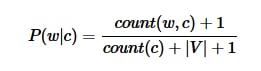

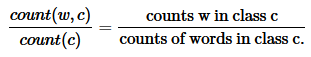

As it is shown above, if we use the new P(w|c), we won't be generating any 0's, so we can be sure that we don't generate any unintentional bias.

<h3>$\color{red}{Section \hspace{0.2cm} Five:}$</h3>

In [13]:
tp_adt = {"vehicles" : 0, "electronic-devices" : 0, "businesses" : 0, "for-the-home" : 0, "personal" : 0, "leisure-hobbies" : 0}
fp_adt = {"vehicles" : 0, "electronic-devices" : 0, "businesses" : 0, "for-the-home" : 0, "personal" : 0, "leisure-hobbies" : 0}
fn_adt = {"vehicles" : 0, "electronic-devices" : 0, "businesses" : 0, "for-the-home" : 0, "personal" : 0, "leisure-hobbies" : 0}
false_answer = {}
correct_detected = 0
for i in range(0, row_no_t):
    max_category = [0, 0, 0, 0, 0, 0]
    for c in range(0, 6):
        for j in range(0, col_no_t - 1):
            words = data_test.iat[i, j]
            for word in words:
                count_w_c = 0
                if word in category_dict[c].keys():
                    count_w_c = category_dict[c][word]

                max_category[c] += math.log(1 + count_w_c)
                max_category[c] -= math.log(1 + len(category_dict[c]) + category_size[c])
                
    maxx = max_category[0]
    is_ok = False
    max_c = category[0]
    for j in range(0, 6):
        maxx = max(maxx, max_category[j])
    for j in range(0, 6):
        if max_category[j] == maxx:
            max_c = category[j]
        if max_category[j] == maxx and data_test.iat[i, col_no_t - 1] == category[j]:
            tp_adt[data_test.iat[i, col_no_t - 1]] += 1
            correct_detected += 1
            is_ok = True
            break
    if not is_ok:
        fp_adt[max_c] += 1
        fn_adt[data_test.iat[i, col_no_t - 1]] += 1
        false_answer.update({i : max_c})
accuracy_d = correct_detected / row_no_t
print("The accuracy of Non Smoothing method is: ", accuracy_d)

The accuracy of Non Smoothing method is:  0.855


We can see that by using the additive smoothing method, we've reached a more precise solution. This is because we handled some of the corner cases (when we encounter a new word in the test data).

<h3>$\color{red}{Section \hspace{0.2cm} Six:}$</h3>

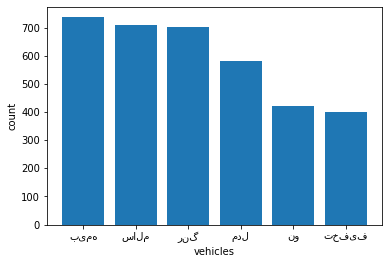

In [14]:
from matplotlib import pyplot as plt
from operator import itemgetter

temp_dict = dict(sorted(category_dict[0].items(), key = itemgetter(1), reverse = True)[:6])
keys = temp_dict.keys()
values = temp_dict.values()
plt.bar(keys, values)
plt.xlabel(category[0])
plt.ylabel('count')
plt.show()

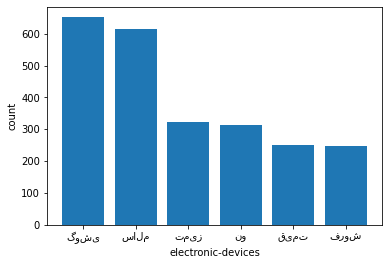

In [15]:
temp_dict = dict(sorted(category_dict[1].items(), key = itemgetter(1), reverse = True)[:6])
keys = temp_dict.keys()
values = temp_dict.values()
plt.bar(keys, values)
plt.xlabel(category[1])
plt.ylabel('count')
plt.show()

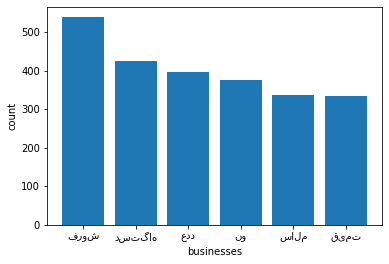

In [16]:
temp_dict = dict(sorted(category_dict[2].items(), key = itemgetter(1), reverse = True)[:6])
keys = temp_dict.keys()
values = temp_dict.values()
plt.bar(keys, values)
plt.xlabel(category[2])
plt.ylabel('count')
plt.show()

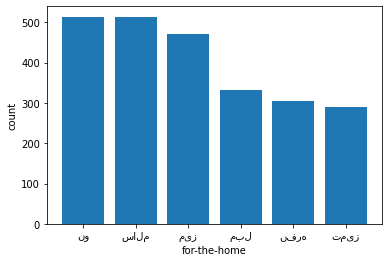

In [17]:
temp_dict = dict(sorted(category_dict[3].items(), key = itemgetter(1), reverse = True)[:6])
keys = temp_dict.keys()
values = temp_dict.values()
plt.bar(keys, values)
plt.xlabel(category[3])
plt.ylabel('count')
plt.show()

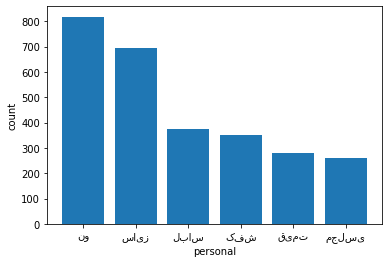

In [18]:
temp_dict = dict(sorted(category_dict[4].items(), key = itemgetter(1), reverse = True)[:6])
keys = temp_dict.keys()
values = temp_dict.values()
plt.bar(keys, values)
plt.xlabel(category[4])
plt.ylabel('count')
plt.show()

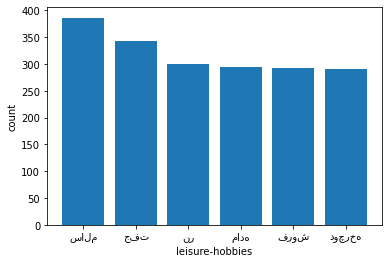

In [19]:
temp_dict = dict(sorted(category_dict[5].items(), key = itemgetter(1), reverse = True)[:6])
keys = temp_dict.keys()
values = temp_dict.values()
plt.bar(keys, values)
plt.xlabel(category[5])
plt.ylabel('count')
plt.show()

The above words are the ones with the highest frequencies. Incidentally, we can delete these words because the chance of extracting usable data from them, is very low.

<h3>$\color{red}{Section \hspace{0.2cm} Seven:}$</h3>

Consider the case where our classifier always picks a specific class like 'vehicle' for an answer. Now the Recall value for this specific class would be 100% which is extremely biased!
On the other hand, if we don't have enough predictions, we won't be having reasonable wrong answers, so our Precision value would be extremely high near the beginning too!

<h3>$\color{red}{Section \hspace{0.2cm} Eight:}$</h3>

F1 is the harmonic mean of Recall and Precision values. In reality if we try to improve Precision, the Recall falls and vice-versa. On ther other hand, to have a high F1, we need to both have a high Precision and Recall, so If we want to create a classification model with the optimal balance of Recall and Precision, we try to maximize the F1 score. In other words, F1 takes both false positives and false negatives into account, so we tend to use it where there's a big difference between Recall and Precision.

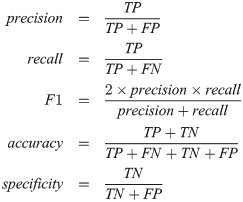

Note that: TP = true positive, TN = true negative, FP = false positive, FN = false negative.

<h3>$\color{red}{Section \hspace{0.2cm} Nine:}$</h3>

Below are some definitions:

**Macro-F1:** an arithmetic mean of the per-class F1-scores. This is regardless of the size of each class.

**Weighted-F1:** a weighted summation of the F1-score of each class. This is in respect to the number of samples from each class.

**Micro-F1:** the summation of micro-averaged precision and micro-averaged recall. We need to calculate FP for precision and FN for recall over all instances. We can conclude that micro-F1 = micro-precision = micro-recall.

<h3>$\color{red}{Section \hspace{0.2cm} Ten:}$</h3>

<h2>Without Additive Smoothing</h2>

In [20]:
sum_of_f = 0
weighted_sum = 0
overall_size = 0
micro_precision_numerator = 0
micro_precision_denominator = 0
micro_recall_denominator = 0
for c in range(0, 6):
    i = category[c]
    precision = tp[i] / (tp[i] + fp[i])
    recall = tp[i] / (tp[i] + fn[i])
    f1 = (2 * precision * recall) / (precision + recall)
    
    print("Category", i)
    print("#TP: ", tp[i])
    print("#FP: ", fp[i])
    print("#FN: ", fn[i])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print()
    sum_of_f += f1
    weighted_sum += f1 * category_size[c]
    overall_size += category_size[c]
    micro_precision_numerator += tp[i]
    micro_precision_denominator += tp[i] + fp[i]
    micro_recall_denominator += tp[i] + fn[i]
prec = micro_precision_numerator / micro_precision_denominator
reca = micro_precision_numerator / micro_recall_denominator
print("Macro Avg:", sum_of_f / 6)
print("Micro Avg:", 2 * prec * reca / (prec + reca))
print("Weighted Avg:", weighted_sum / overall_size)


Category vehicles
#TP:  5
#FP:  393
#FN:  295
Precision: 0.01256281407035176
Recall: 0.016666666666666666
F1: 0.014326647564469913

Category electronic-devices
#TP:  7
#FP:  388
#FN:  293
Precision: 0.017721518987341773
Recall: 0.023333333333333334
F1: 0.02014388489208633

Category businesses
#TP:  8
#FP:  99
#FN:  292
Precision: 0.07476635514018691
Recall: 0.02666666666666667
F1: 0.03931203931203931

Category for-the-home
#TP:  10
#FP:  402
#FN:  290
Precision: 0.024271844660194174
Recall: 0.03333333333333333
F1: 0.028089887640449437

Category personal
#TP:  9
#FP:  336
#FN:  291
Precision: 0.02608695652173913
Recall: 0.03
F1: 0.027906976744186043

Category leisure-hobbies
#TP:  5
#FP:  138
#FN:  295
Precision: 0.03496503496503497
Recall: 0.016666666666666666
F1: 0.02257336343115124

Macro Avg: 0.025392133264063713
Micro Avg: 0.024444444444444446
Weighted Avg: 0.024932127726801246


In [21]:
# from sklearn.metrics import classification_report
# y_true = data_test['categories']

# print(classification_report(y_true, y_pred, target_names=["vehicles", "electronic-devices", "businesses", "for-the-home", "personal", "leisure-hobbies"]))

<h2>With Additive Smoothing</h2>

In [22]:
sum_of_f = 0
weighted_sum = 0
overall_size = 0
micro_precision_numerator = 0
micro_precision_denominator = 0
micro_recall_denominator = 0

for c in range(0, 6):
    i = category[c]
    precision = tp_adt[i] / (tp_adt[i] + fp_adt[i])
    recall = tp_adt[i] / (tp_adt[i] + fn_adt[i])
    f1 = (2 * precision * recall) / (precision + recall)
    
    print("Category", i)
    print("#TP: ", tp_adt[i])
    print("#FP: ", fp_adt[i])
    print("#FN: ", fn_adt[i])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print()
    sum_of_f += f1
    weighted_sum += f1 * category_size[c]
    overall_size += category_size[c]
    micro_precision_numerator += tp_adt[i]
    micro_precision_denominator += tp_adt[i] + fp_adt[i]
    micro_recall_denominator += tp_adt[i] + fn_adt[i]
prec = micro_precision_numerator / micro_precision_denominator
reca = micro_precision_numerator / micro_recall_denominator
print("Macro Avg:", sum_of_f / 6)
print("Micro Avg:", 2 * prec * reca / (prec + reca))
print("Weighted Avg:", weighted_sum / overall_size)


Category vehicles
#TP:  273
#FP:  18
#FN:  27
Precision: 0.9381443298969072
Recall: 0.91
F1: 0.9238578680203046

Category electronic-devices
#TP:  265
#FP:  21
#FN:  35
Precision: 0.9265734265734266
Recall: 0.8833333333333333
F1: 0.9044368600682593

Category businesses
#TP:  215
#FP:  55
#FN:  85
Precision: 0.7962962962962963
Recall: 0.7166666666666667
F1: 0.7543859649122806

Category for-the-home
#TP:  269
#FP:  105
#FN:  31
Precision: 0.7192513368983957
Recall: 0.8966666666666666
F1: 0.798219584569733

Category personal
#TP:  269
#FP:  46
#FN:  31
Precision: 0.8539682539682539
Recall: 0.8966666666666666
F1: 0.8747967479674796

Category leisure-hobbies
#TP:  248
#FP:  16
#FN:  52
Precision: 0.9393939393939394
Recall: 0.8266666666666667
F1: 0.8794326241134751

Macro Avg: 0.8558549416085887
Micro Avg: 0.855
Weighted Avg: 0.8598251763730809


<h3>$\color{red}{Section \hspace{0.2cm} Eleven:}$</h3>

We can see that F1 has improved significantly and is nearly equal to $\frac{9}{10}.$ We expected such result because we'd eliminated some corner cases.

<h3>$\color{red}{Section \hspace{0.2cm} Twelve:}$</h3>

In [23]:
i = j = 0
while i < row_no_t and j < 5:
    if i in false_answer:
        print("One false answer is on row no.", i, ", while the correct answer is ", data_test.iat[i, col_no_t - 1], ", we've estimated ", false_answer[i], "\n", sep='')
        j += 1
    i += 1

One false answer is on row no.6, while the correct answer is leisure-hobbies, we've estimated businesses

One false answer is on row no.16, while the correct answer is leisure-hobbies, we've estimated for-the-home

One false answer is on row no.26, while the correct answer is vehicles, we've estimated for-the-home

One false answer is on row no.28, while the correct answer is for-the-home, we've estimated businesses

One false answer is on row no.37, while the correct answer is businesses, we've estimated for-the-home



We can check to see why we've generated a wrong answer. Take row 28 for example:

In [24]:
print(data_test.iat[28, 0])
print(data_test.iat[28, 1])

['موتور', 'تزیینی']
['جنس', 'اهن', 'کار', 'دست', 'عرضه', 'تکی']


You can see that because of the words like موتور, کار, اهن and عرضه we've guessed categorized this advertise in businesses. We can reduce such errors if we ask the customers to write in a more detailed fashion. We can only organize the data so far, so we can't expect an error proof answer, especially when we're dealing with such short ones!
Consider row 37:

In [25]:
print(data_test.iat[37, 0])
print(data_test.iat[37, 1])

['90', 'عدد', 'بشقاب', 'پیتزا', 'تک', 'نفره', 'قیمت', 'هرعدد', '4000']
['بشقاب', 'پیتزا', 'نفره', 'عددی', '4000', 'باتشکراز', 'دیوار']


Again, we can't exactly decide between businesses or for-the-home. This advertise is even kind of confusing because it is only natural to think of for-the-home items when seeing بشقاب or پیتزا!